In [1]:
import hydra
import pandas as pd
import pymongo
import seaborn as sns
import matplotlib.pyplot as plt

from data_lake.constants import (
    DB_ADDRESS,
    DEFAULT_RESAMPLED_SPACING,
    TARGET_COLLECTION,
    TARGET_DB,
)
from shared_lib.enums import RunMode
from projects.downstream.datasets.luna25 import DataKeys
from tools.visualizer import save_plot

In [2]:
_VUNO_LUNG_DB = DB_ADDRESS
_CLIENT = pymongo.MongoClient(_VUNO_LUNG_DB)

In [3]:
# set projection
projection = {}

# set query
query = {}

# get list of 'data_source'
docs = [x for x in _CLIENT[TARGET_DB][TARGET_COLLECTION].find(query, projection)]
print(len(docs))
df = pd.DataFrame(docs)

6163


# Metadata

### Gender

In [4]:
df.keys()

Index(['_id', 'patient_id', 'series_instance_uid', 'annotation_id',
       'studydate', 'h5_path', 'fold', 'label', 'age_at_study', 'gender',
       'origin', 'transform', 'spacing', 'resampled_spacing', 'w_coord_zyx',
       'd_coord_zyx', 'r_coord_zyx'],
      dtype='object')

In [5]:
# 시각화 스타일 설정 (선택사항)
sns.set(style="whitegrid")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


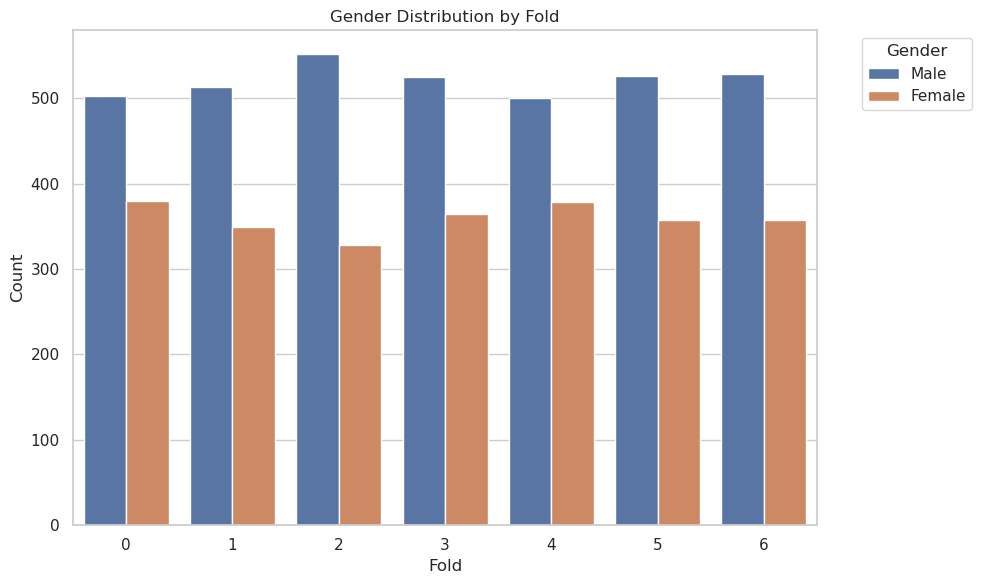

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fold', hue='gender')

plt.title("Gender Distribution by Fold")
plt.xlabel("Fold")
plt.ylabel("Count")
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Age

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


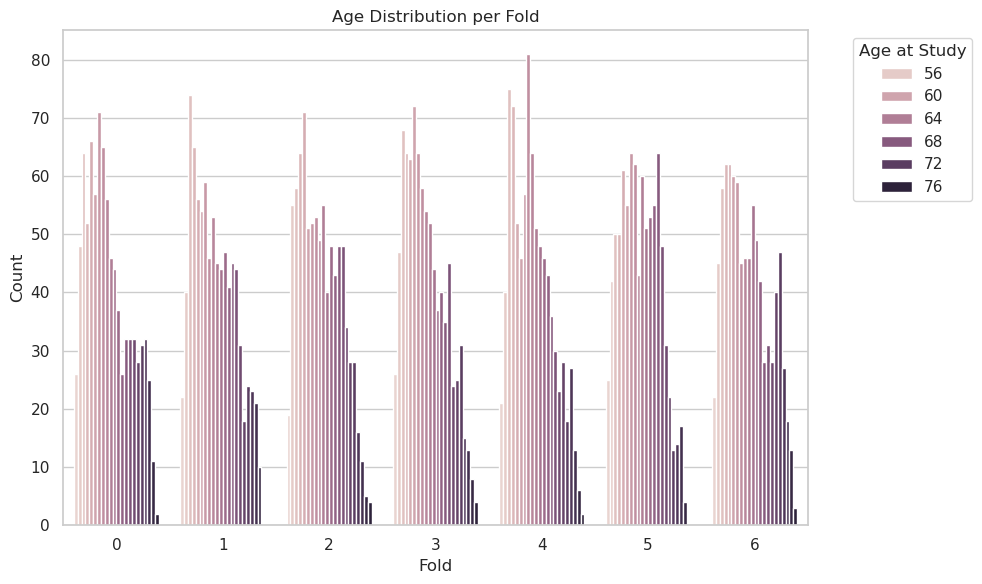

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fold', hue='age_at_study')

plt.title('Age Distribution per Fold')
plt.xlabel('Fold')
plt.ylabel('Count')
plt.legend(title='Age at Study', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization patch used in the trainer

In [8]:
with hydra.initialize_config_module(config_module="projects.downstream.configs", version_base=None):
    config = hydra.compose(config_name="config")

run_modes = [RunMode(m) for m in config.run_modes] if "run_modes" in config else [x for x in RunMode]
loaders = {
    mode: hydra.utils.instantiate(config.inputs, dataset={"mode": mode}, drop_last=False, shuffle=False)
    for mode in run_modes
}

## Train data loader

In [9]:
loader = loaders[RunMode.TRAIN]
for i, data in enumerate(loader):
    patch_image = data[DataKeys.IMAGE]
    break

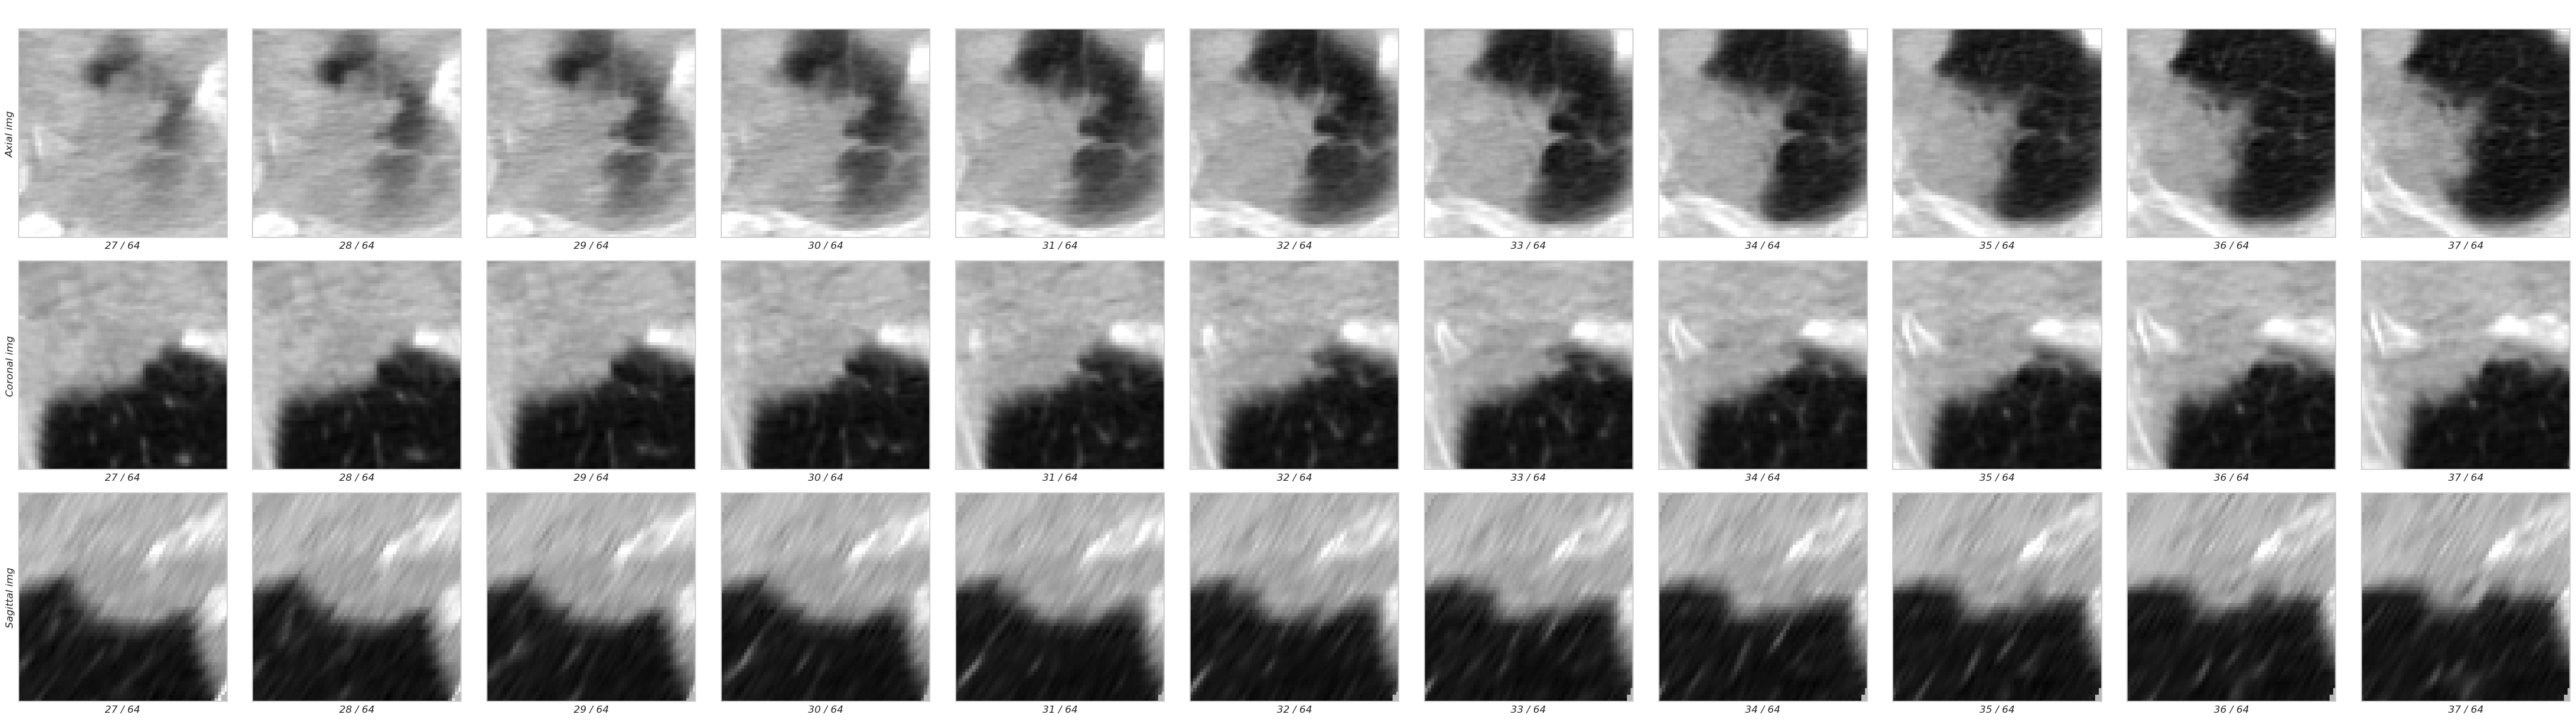

In [10]:
# Coronal에서 이미지가 블러리
image = patch_image[0][0].numpy()
save_plot(input_image=image, meta={}, use_norm=False)

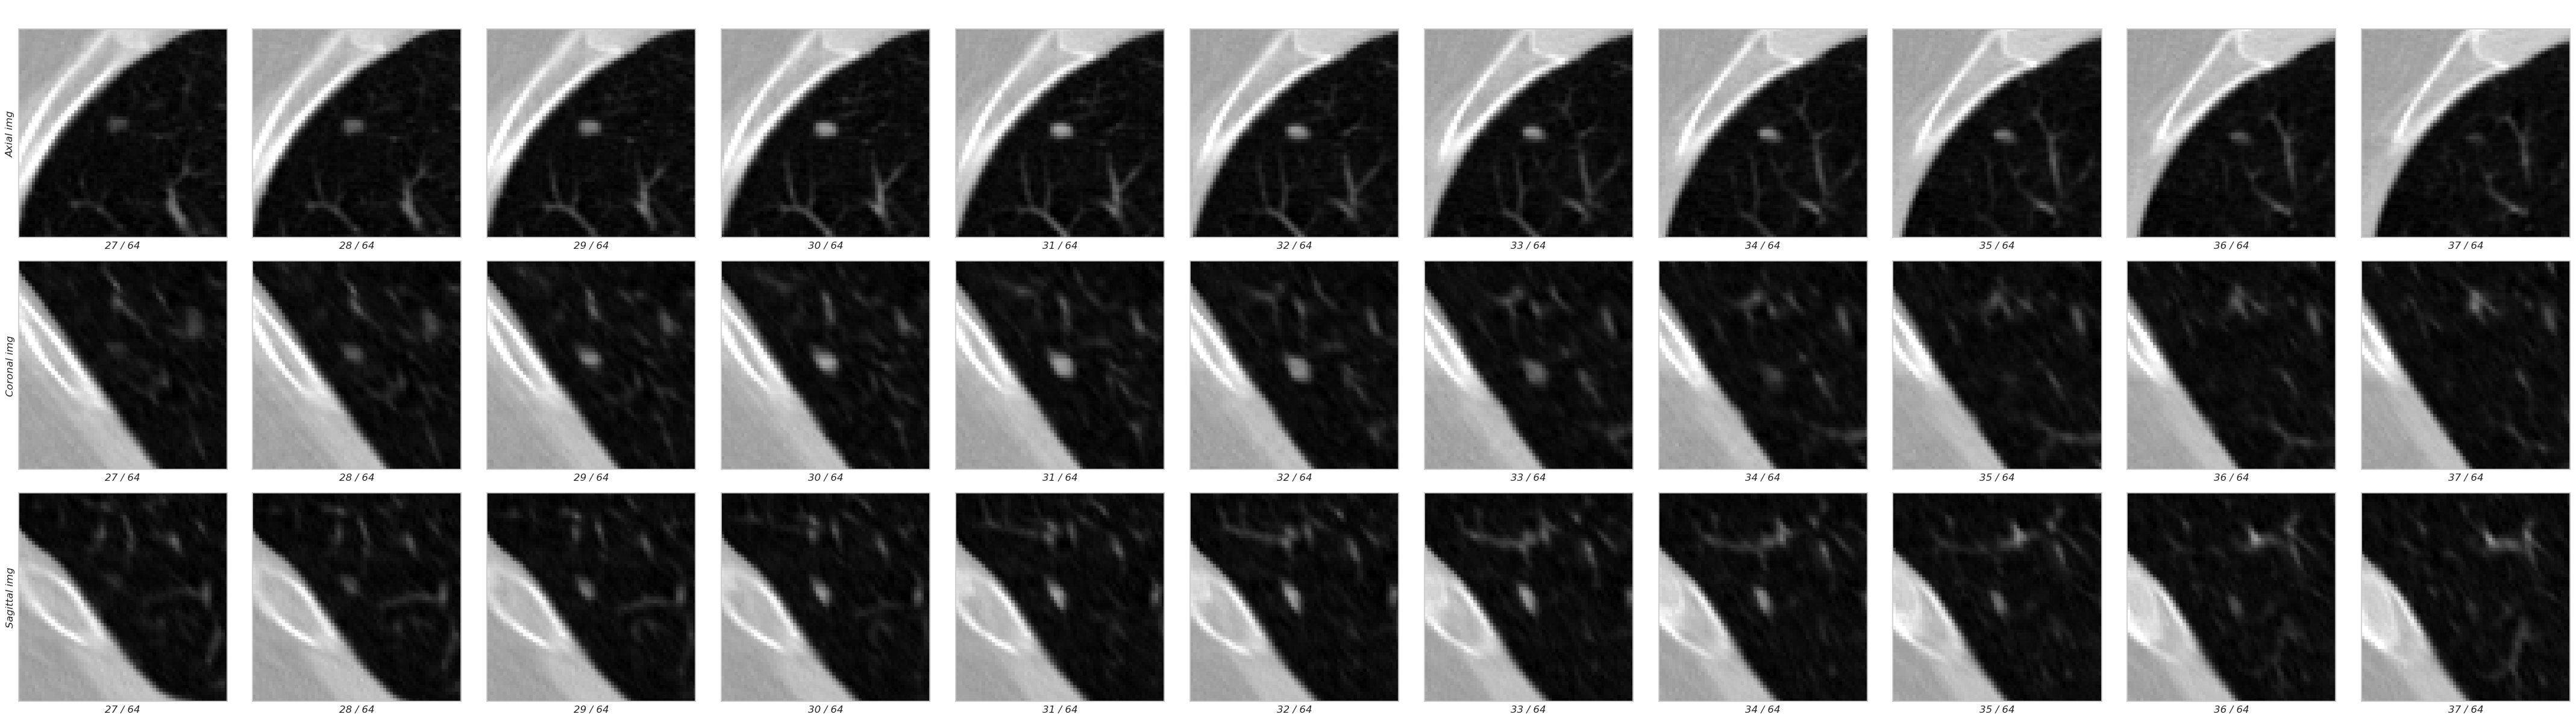

In [11]:
# Sagittal에서 이미지가 블러리
image = patch_image[1][0].numpy()
save_plot(input_image=image, meta={}, use_norm=False)

## Test data loader

In [12]:
loader = loaders[RunMode.TEST]
for i, data in enumerate(loader):
    patch_image = data[DataKeys.IMAGE]
    break

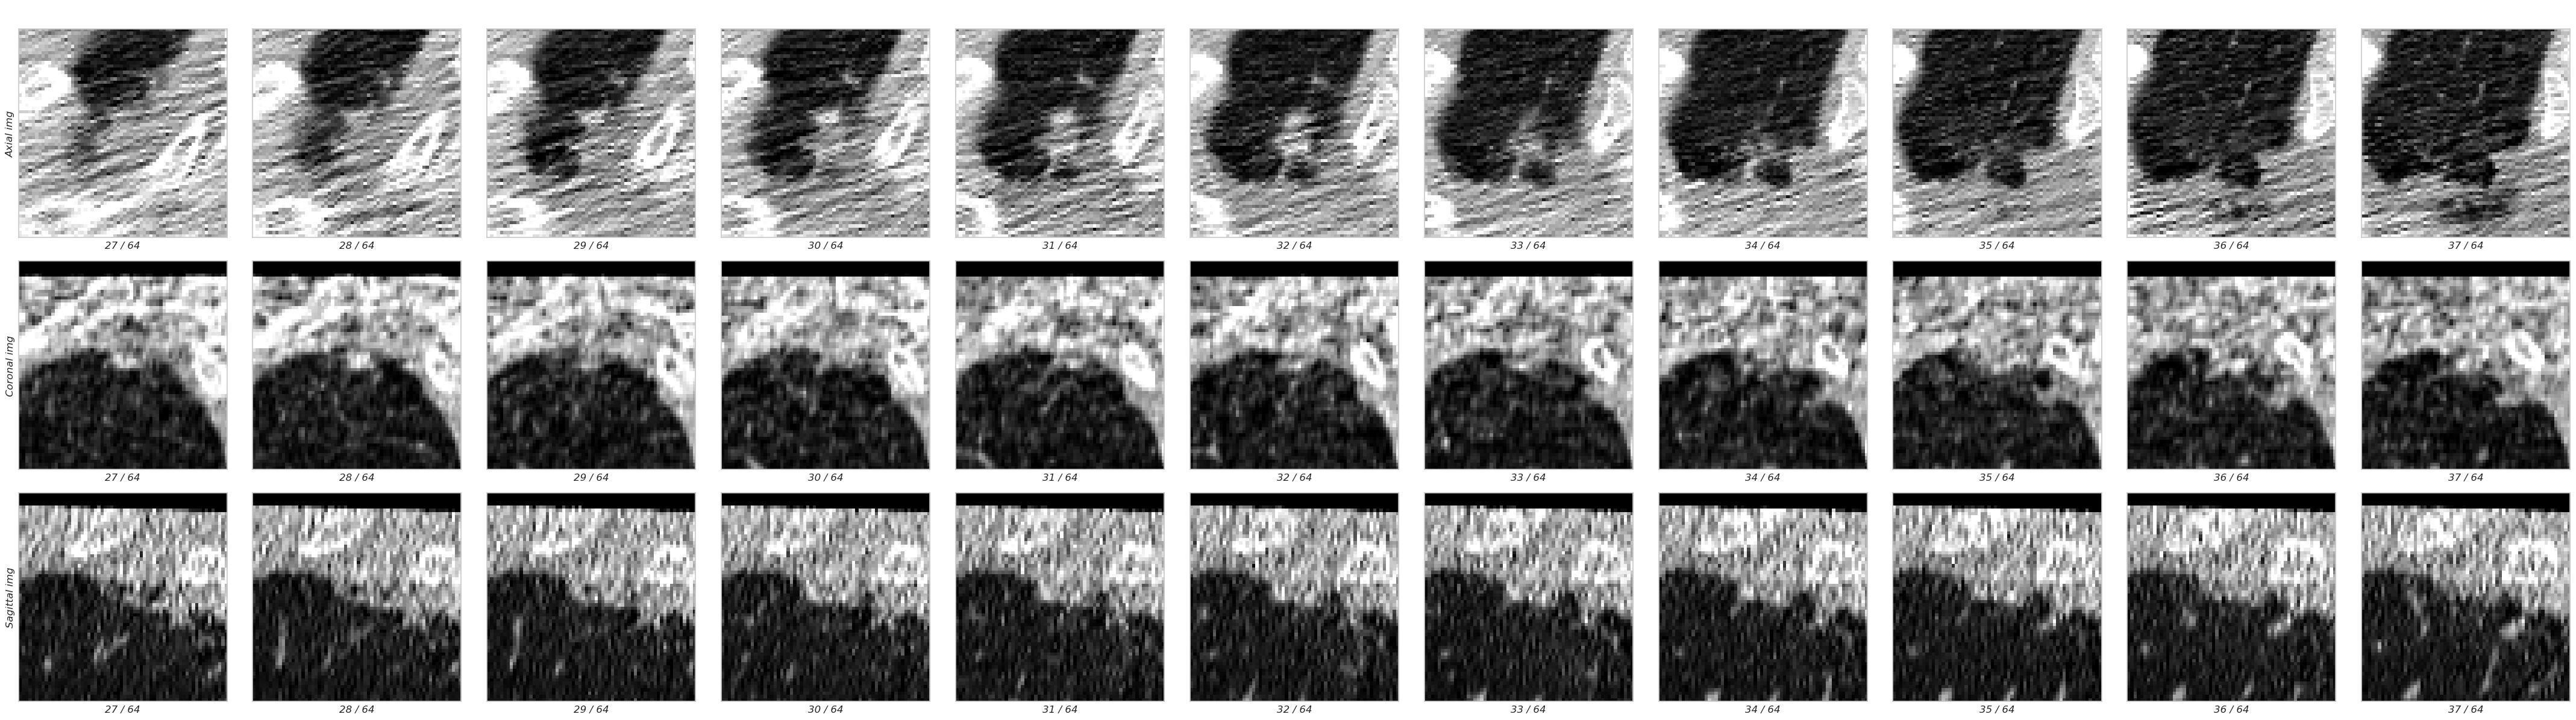

In [13]:
# HU value가 다른 영상과 큰 차이가 남
image = patch_image[0][0].numpy()
save_plot(input_image=image, meta={}, use_norm=False)

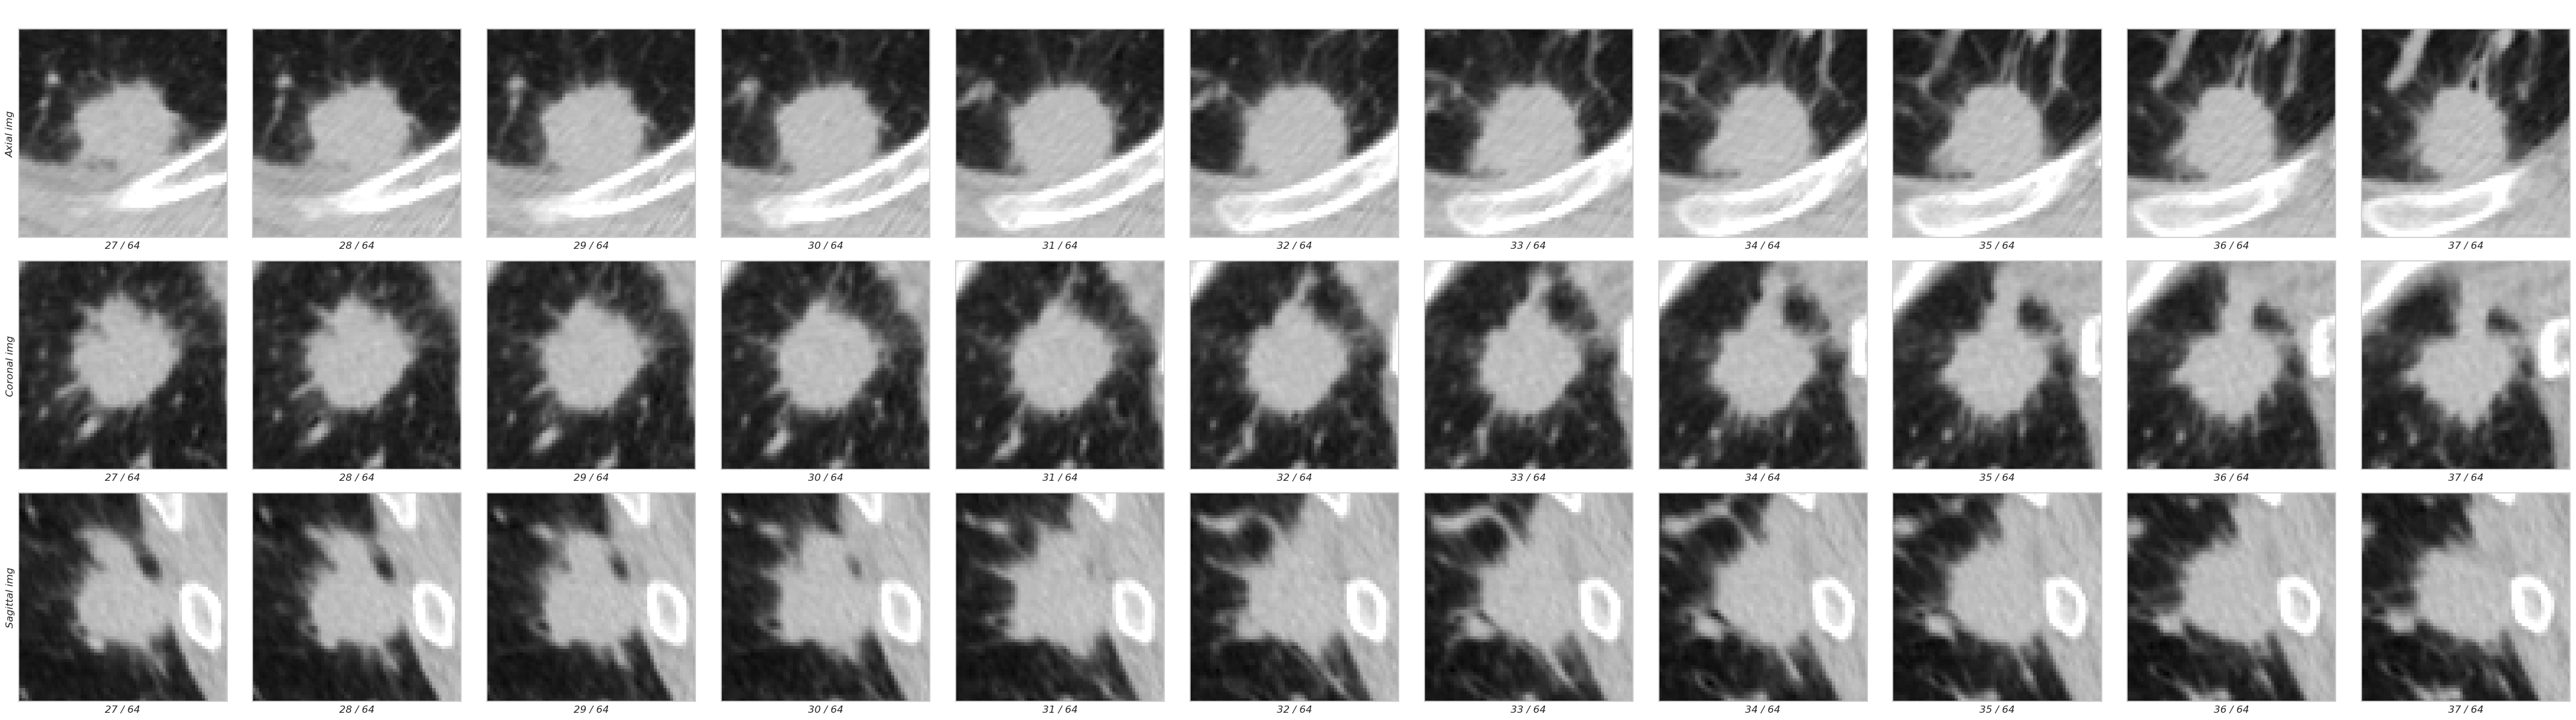

In [14]:
# patch size가 적당한지 고민
image = patch_image[24][0].numpy()
save_plot(input_image=image, meta={}, use_norm=False)